# ***Business Understanding***
- We have to classify the cancer presence in terms of Gene One and Gene Two .
- After classifying, we have to build a predictive model to predict cancer with high accuracy using several algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# ***Data Understanding***

In [3]:
df.shape

(3000, 3)

In [4]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [7]:
df.duplicated().sum()

862

# ***Data Preprocessing***

***Data Cleaning***

In [8]:
# No missing values present
# Droping the duplicates values
df.drop_duplicates(inplace = True)

## ***EDA***

In [9]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

**Cancer Present**

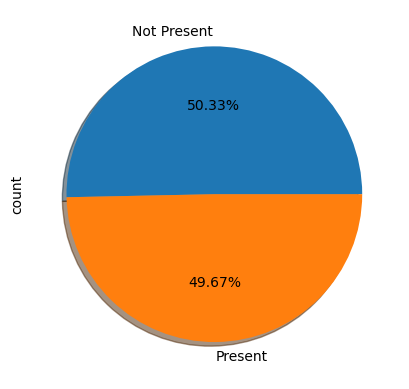

In [10]:
df["Cancer Present"].value_counts().plot(kind = "pie", autopct = "%0.02f%%", shadow = True, labels = ["Not Present", "Present"])
plt.show()

**Gene One**

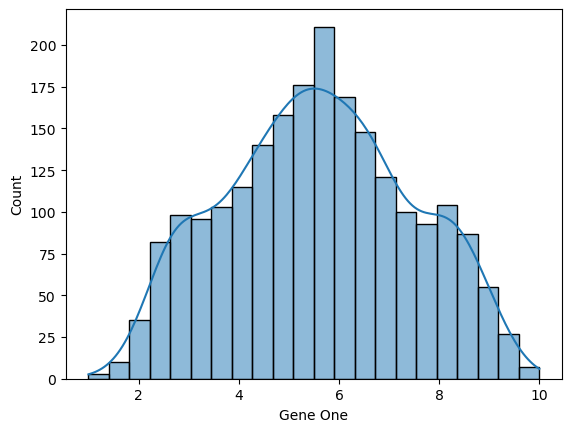

In [11]:
sns.histplot(df["Gene One"], kde = True)
plt.show()

In [12]:
df.groupby("Cancer Present")["Gene One"].mean()

Cancer Present
0    4.603160
1    6.590584
Name: Gene One, dtype: float64

**Gene Two**

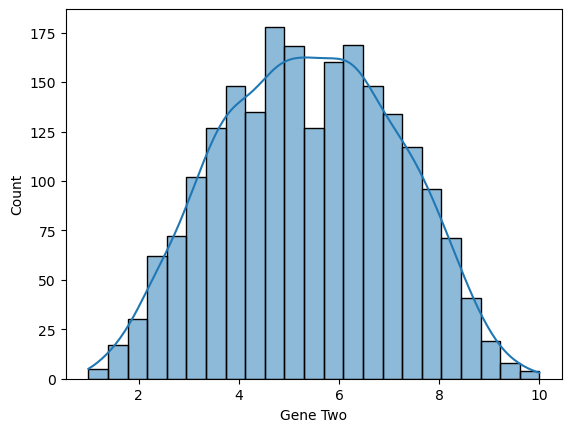

In [13]:
sns.histplot(df["Gene Two"], kde = True)
plt.show()

In [14]:
df.groupby("Cancer Present")["Gene Two"].mean()

Cancer Present
0    6.543959
1    4.251601
Name: Gene Two, dtype: float64

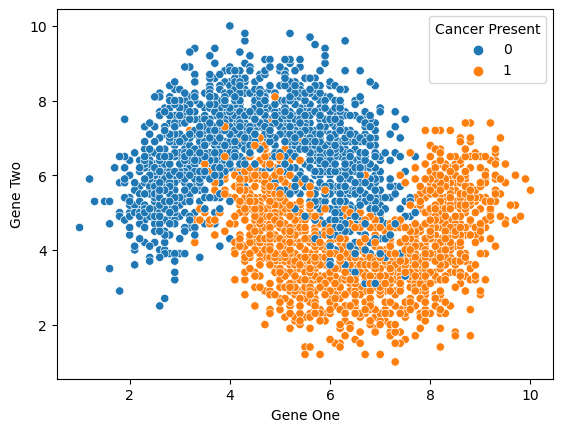

In [15]:
sns.scatterplot(x = df["Gene One"], y = df["Gene Two"], hue = df["Cancer Present"])
plt.show()

In [20]:
corr = df.corr()
corr

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.341952,0.534585
Gene Two,-0.341952,1.000000,-0.655172
Cancer Present,0.534585,-0.655172,1.000000


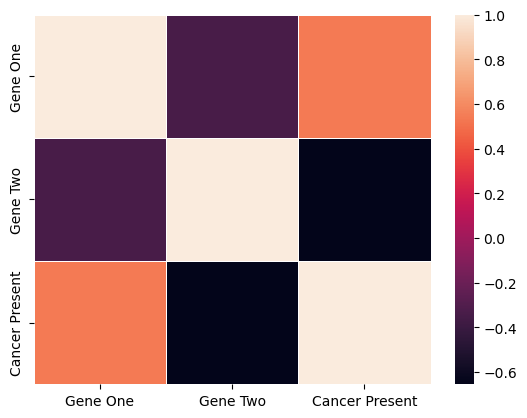

In [22]:
sns.heatmap(corr, linewidth = 0.5)
plt.show()

## ***Data Wrangling***

**Feature Transformation**

In [16]:
df.skew()

Gene One          0.023016
Gene Two         -0.010543
Cancer Present    0.013106
dtype: float64

- It is noramally distributed. So, there is no need of feature transformation.
- No encoding required because absense of categorical variable.
- No scaling required.

In [17]:
df.to_csv("gene_expression_analyzed.csv", index = False)